In [1]:
import os
from google.colab import drive
import polars as pl
import pandas as pd
import random
import matplotlib.pyplot as plt

#mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
path = '/content/drive/MyDrive/msc_project'
os.chdir(path)
os.listdir()

['Miniconda3-py39_23.3.1-0-Linux-x86_64.sh',
 'Miniconda3-py39_23.3.1-0-Linux-x86_64.sh.1',
 'all_paired',
 'useful_functions.py',
 '__pycache__',
 'mmseqs2_output']

In [ ]:
!pip install pyperclip
!pip install bio
from useful_functions import fasta_to_df, df_to_fasta, add_counts

In [ ]:
df = fasta_to_df('mmseqs2_output (1)/clusterRes_rep_seq.fasta')

In [ ]:
linker = 'SGGSTITSYNVYYTKLSSSGT'

df['heavy'] = df[1].apply(lambda x: x.split(linker)[0])
df['light'] = df[1].apply(lambda x: x.split(linker)[1])

In [ ]:
random.seed(42)

l = df[0].to_list()
l = random.choices(l, k=100)

subdf = df[df[0].isin(l)]

subdf.shape

subdf.to_csv('230604_random_100.csv')

(100, 4)

In [ ]:
df.drop_duplicates(subset=0).shape

(138949, 2)

In [ ]:
df = pd.read_csv('clusterRes_cluster.tsv', sep='\t', header=None)

In [ ]:
df.head()

,0,1
0,AAACCTGAGACTAAGT-1_contig_3,AAACCTGAGACTAAGT-1_contig_3
1,AAACCTGAGACTAAGT-1_contig_3,CTCTAATAGTACGATA-1_contig_1
2,AAACCTGAGTGCTGCC-1_contig_2,AAACCTGAGTGCTGCC-1_contig_2
3,AAACCTGCAGGATTGG-1_contig_2,AAACCTGCAGGATTGG-1_contig_2
4,AAACCTGCAGGATTGG-1_contig_2,CGTTAGATCGGGAGTA-1_contig_2


In [ ]:
# df = add_counts(df, 0, 'cluster_size')

# df.sort_values(by='cluster_size', ascending=False, inplace=True)

# df.drop_duplicates(subset=0, inplace=True)

df.to_csv('clusters.csv')
# df['cluster_size'].hist()
# plt.yscale('log')
# plt.show()

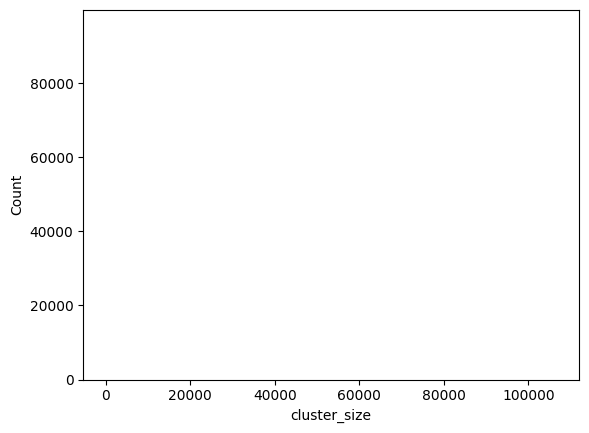

In [ ]:
# # Calculate the frequency of each cluster size
cluster_freq = df['cluster_size'].value_counts().sort_index()
# import seaborn as sns
# sns.histplot(data=df, x='cluster_size', discrete=True)
# # Create the histogram
# plt.bar(cluster_freq.index.astype(int), cluster_freq.values)
#plt.show()

#print(type(cluster_freq))